In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exploring-predictive-health-factors/sample_submission.csv
/kaggle/input/exploring-predictive-health-factors/train.csv
/kaggle/input/exploring-predictive-health-factors/test.csv


## Loading Data

In [28]:
full_test = pd.read_csv('/kaggle/input/exploring-predictive-health-factors/test.csv')
full_train= pd.read_csv('/kaggle/input/exploring-predictive-health-factors/train.csv')
full_test.head(),full_train.head()

(   ID           Age  Weight_kg Hormonal_Imbalance Hyperandrogenism Hirsutism  \
 0   0         20-25       54.0                 No               No        No   
 1   1         20-25       65.0                Yes               No        No   
 2   2         20-25       64.0                Yes               No        No   
 3   3  Less than 20       57.0                Yes               No       Yes   
 4   4  Less than 20        6.0                Yes               No       Yes   
 
   Conception_Difficulty Insulin_Resistance Exercise_Frequency Exercise_Type  \
 0                    No                 No             Rarely   No Exercise   
 1                    No                 No   3-4 Times a Week   No Exercise   
 2                    No                 No   6-8 Times a Week  Cardio (e.g.   
 3                    No                Yes             Rarely   No Exercise   
 4                    No                 No             Rarely  Cardio (e.g.   
 
       Exercise_Duration Sleep

## Initial Analysis

In [29]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     210 non-null    int64  
 1   Age                    209 non-null    object 
 2   Weight_kg              208 non-null    float64
 3   PCOS                   210 non-null    object 
 4   Hormonal_Imbalance     208 non-null    object 
 5   Hyperandrogenism       207 non-null    object 
 6   Hirsutism              205 non-null    object 
 7   Conception_Difficulty  209 non-null    object 
 8   Insulin_Resistance     209 non-null    object 
 9   Exercise_Frequency     208 non-null    object 
 10  Exercise_Type          208 non-null    object 
 11  Exercise_Duration      208 non-null    object 
 12  Sleep_Hours            208 non-null    object 
 13  Exercise_Benefit       209 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 23.1+ KB

In [30]:
full_train.describe()

,ID,Weight_kg
count,210.000000,208.000000
mean,104.500000,56.159615
std,60.765944,12.572768
min,0.000000,20.000000
25%,52.250000,48.000000
50%,104.500000,55.000000
75%,156.750000,64.000000
max,209.000000,116.000000


In [31]:
full_train.nunique()

ID                       210
Age                       10
Weight_kg                 59
PCOS                       2
Hormonal_Imbalance         4
Hyperandrogenism           2
Hirsutism                  3
Conception_Difficulty      4
Insulin_Resistance         3
Exercise_Frequency         8
Exercise_Type             16
Exercise_Duration          8
Sleep_Hours                5
Exercise_Benefit           4
dtype: int64

In [32]:
full_train.isna().sum()

ID                       0
Age                      1
Weight_kg                2
PCOS                     0
Hormonal_Imbalance       2
Hyperandrogenism         3
Hirsutism                5
Conception_Difficulty    1
Insulin_Resistance       1
Exercise_Frequency       2
Exercise_Type            2
Exercise_Duration        2
Sleep_Hours              2
Exercise_Benefit         1
dtype: int64

In [33]:
full_train.duplicated().sum()

0

## Exploratory Data Analysis

In [34]:
full_train['PCOS'].value_counts()

PCOS
No     164
Yes     46
Name: count, dtype: int64

In [35]:
full_train_pcos = full_train[full_train['PCOS']=='Yes']

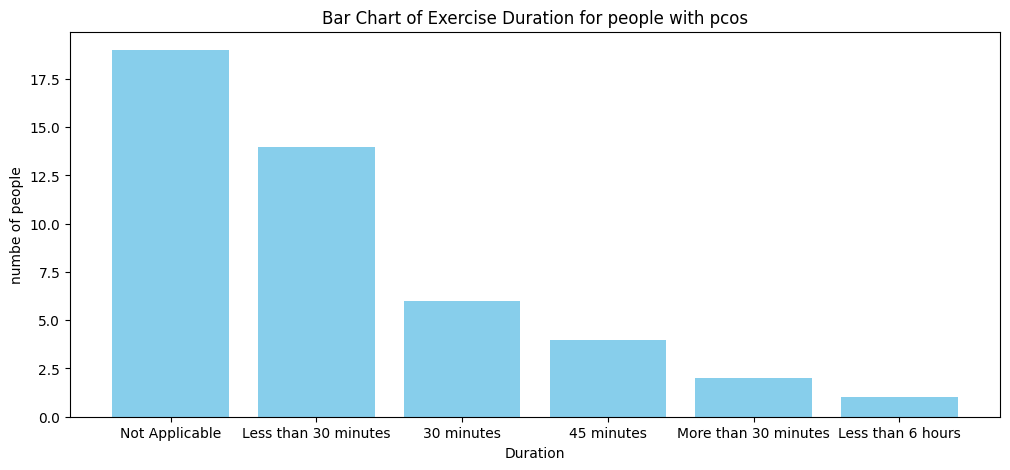

In [36]:
import matplotlib.pyplot as plt
category_counts = full_train_pcos['Exercise_Duration'].value_counts()

plt.figure(figsize=(12, 5))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Duration')
plt.ylabel('numbe of people')
plt.title('Bar Chart of Exercise Duration for people with pcos')
plt.show()

**We can note that people who are not exercising that often have high chances of developing PCOS**

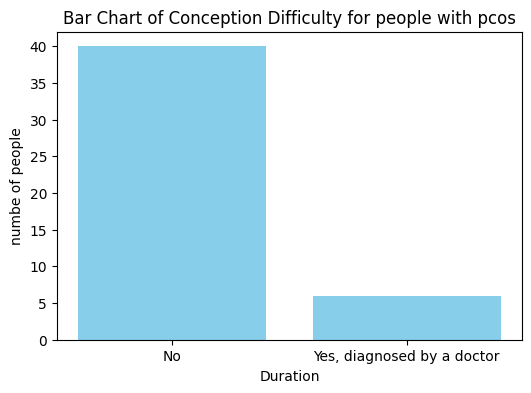

In [37]:
category_counts = full_train_pcos['Conception_Difficulty'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Duration')
plt.ylabel('numbe of people')
plt.title('Bar Chart of Conception Difficulty for people with pcos')
plt.show()

Text(0.5, 1.0, 'Age Distribution for people with PCOS')

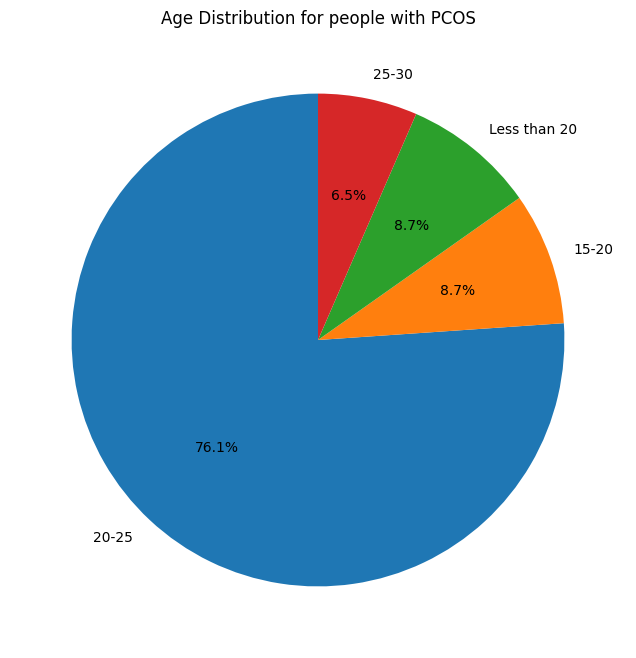

In [38]:
data = full_train_pcos['Age'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title("Age Distribution for people with PCOS")

**We can note that people in the age group of 20-25 have a higher chance of developing PCOS**

In [39]:
full_train_pcos.nunique()

ID                       46
Age                       4
Weight_kg                34
PCOS                      1
Hormonal_Imbalance        2
Hyperandrogenism          2
Hirsutism                 3
Conception_Difficulty     2
Insulin_Resistance        2
Exercise_Frequency        6
Exercise_Type            10
Exercise_Duration         6
Sleep_Hours               3
Exercise_Benefit          4
dtype: int64

In [40]:
full_train_pcos['Hyperandrogenism'].value_counts()

Hyperandrogenism
Yes    24
No     22
Name: count, dtype: int64

In [41]:
full_train_pcos['Insulin_Resistance'].value_counts()

Insulin_Resistance
No     29
Yes    17
Name: count, dtype: int64

In [42]:
full_train_pcos['Hirsutism'].value_counts()

Hirsutism
Yes                                   26
No                                    17
No, Yes, not diagnosed by a doctor     1
Name: count, dtype: int64

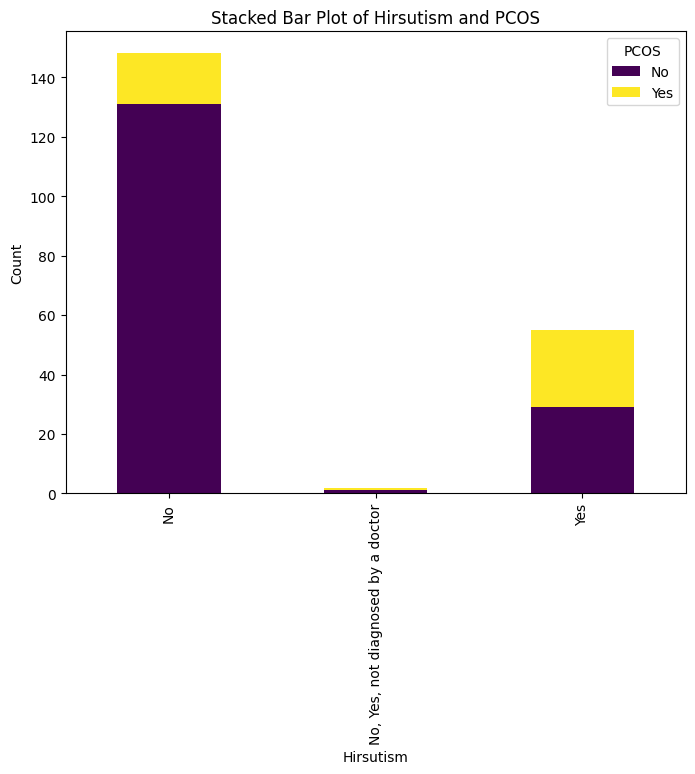

In [43]:
crosstab = pd.crosstab(full_train['Hirsutism'], full_train['PCOS'])

# Stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Stacked Bar Plot of Hirsutism and PCOS')
plt.xlabel('Hirsutism')
plt.ylabel('Count')
plt.legend(title='PCOS')
plt.show()


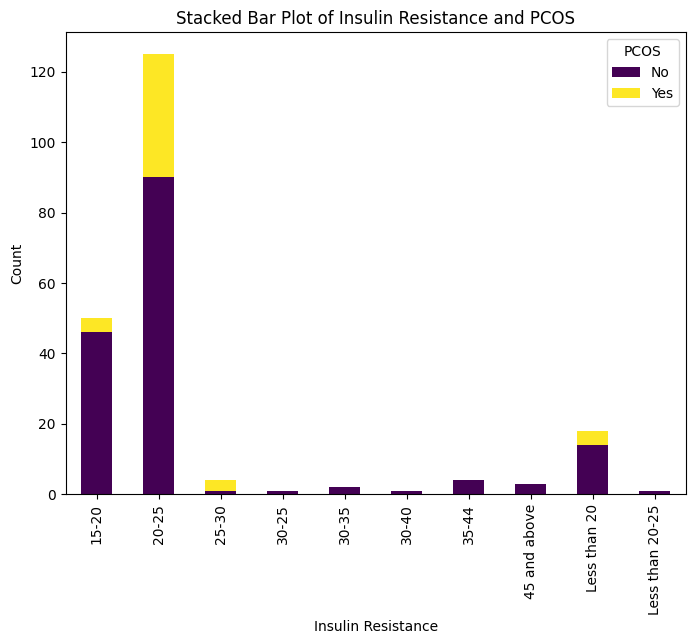

In [44]:
crosstab = pd.crosstab(full_train['Age'], full_train['PCOS'])

# Stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Stacked Bar Plot of Insulin Resistance and PCOS')
plt.xlabel('Insulin Resistance')
plt.ylabel('Count')
plt.legend(title='PCOS')
plt.show()


**This graph shows that the data mostly consists of people in the age group of 20-25 but if we consider the ratio of people with PCOS to those without it is  higher for the age group of 25-30**<br>
**Also it can be seen that the people from the age 30 above according to this data do not have any examples for women with PCOS**<br>
**The category Less than 20-25 is too ambigous and cannot be used for any inference in this particular dataset and hence can be dropped**<br>

In [45]:
full_train['Age'].value_counts()/full_train_pcos['Age'].value_counts()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Age
15-20              12.500000
20-25               3.571429
25-30               1.333333
30-25                    NaN
30-35                    NaN
30-40                    NaN
35-44                    NaN
45 and above             NaN
Less than 20        4.500000
Less than 20-25          NaN
Name: count, dtype: float64

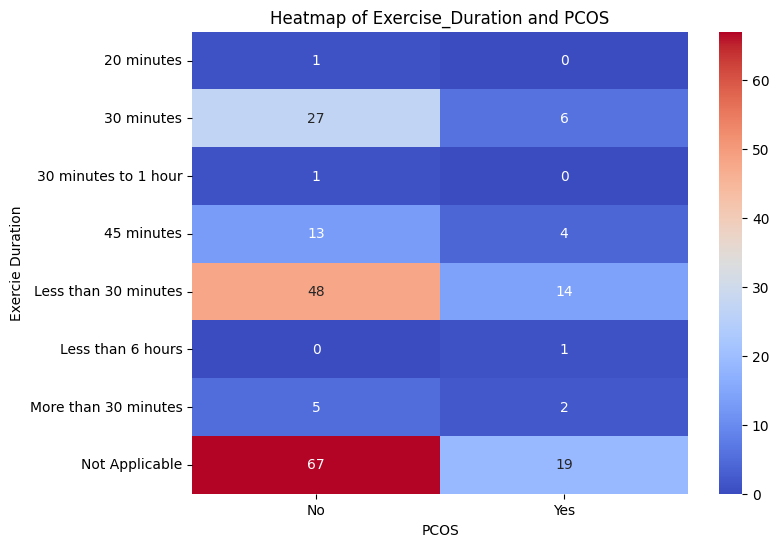

In [46]:
import seaborn as sns
crosstab = pd.crosstab(full_train['Exercise_Duration'], full_train['PCOS'])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Exercise_Duration and PCOS')
plt.xlabel('PCOS')
plt.ylabel('Exercie Duration')
plt.show()

**Again we can note that people who do not exercise have a higher frequency in this dataset as compared to other categories**<BR>
**Also from all the other graphs that the PCOS class is highly imbalanced**

In [47]:
full_train['Exercise_Duration'].value_counts()/full_train_pcos['Exercise_Duration'].value_counts()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Exercise_Duration
20 minutes                   NaN
30 minutes              5.500000
30 minutes to 1 hour         NaN
45 minutes              4.250000
Less than 30 minutes    4.428571
Less than 6 hours       1.000000
More than 30 minutes    3.500000
Not Applicable          4.526316
Name: count, dtype: float64

## Feature Engineering

In [48]:
X = full_train.drop(columns=["PCOS","ID"],axis=1)
full_train['PCOS']=full_train['PCOS'].map({'Yes':1,'No':0})
y=full_train['PCOS']
test_data = full_test.drop(columns=["ID"],axis=1)

In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

numerical_features = ['Weight_kg']  
categorical_features = ['Hormonal_Imbalance','Hyperandrogenism','Hirsutism','Conception_Difficulty',
                        'Insulin_Resistance','Exercise_Frequency','Exercise_Type','Exercise_Duration',
                        'Sleep_Hours','Exercise_Benefit','Age']         


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())                
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))     
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train = preprocessor.fit_transform(X)
X_test = preprocessor.transform(test_data)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y)

In [51]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train_balanced,y_train_balanced)
predictions =  model.predict_proba(X_test)[:, 1]
output = pd.DataFrame({'ID': full_test.ID, 'PCOS': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Summary Statistics:
                ID   Weight_kg
count  189.000000  189.000000
mean   103.841270   56.265079
std     61.548771   12.849213
min      0.000000   20.000000
25%     51.000000   48.000000
50%    104.000000   55.000000
75%    156.000000   64.000000
max    209.000000  116.000000


ValueError: could not convert string to float: '20-25'

<Figure size 1200x800 with 0 Axes>